In [1]:
# For importing from folder without installing
import sys
sys.path.append("..")

# Other packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from varv.io import labview
from varv.preprocessing import eventdetection
from varv.base import Raw
from varv.events import Events

In [2]:
CONVERT = True
fname = "240130_JR_JS530_pore1_perf1_f1"

if CONVERT:
    # folder = r"C:\Users\twh\OneDrive - Delft University of Technology\MSc\Year_2\NB5900_Master_End_Project\transfer_2875528_files_e7079156"
    folder = ''
    raw = labview.read_measurement_dat(f"{os.path.join(folder, fname)}.dat")
    raw.save()
else:
    raw = Raw.from_h5(fname)

len(raw)

240130_JR_JS530_pore1_perf1_f1.dat
Reading... 
190.735 MB
Raw at 50,000 Hz
Downsampling... 
Calibrating...
Done!


5000000

In [3]:
raw.data.iloc[10:20]

,v,i,state
10,181.835026,75.233755,0
11,181.818376,75.072503,0
12,181.823233,75.800834,0
13,181.803246,74.016985,0
14,181.810666,75.976782,0
15,181.810981,75.452608,0
16,181.786570,71.687781,0
17,181.827357,74.825199,0
18,181.824874,76.262060,0
19,181.822285,75.629390,0


(<Figure size 1200x400 with 1 Axes>,
 <Axes: title={'center': '240130_JR_JS530_pore1_perf1_f1\nRaw'}, xlabel='Time (s)', ylabel='Current (pA)'>)

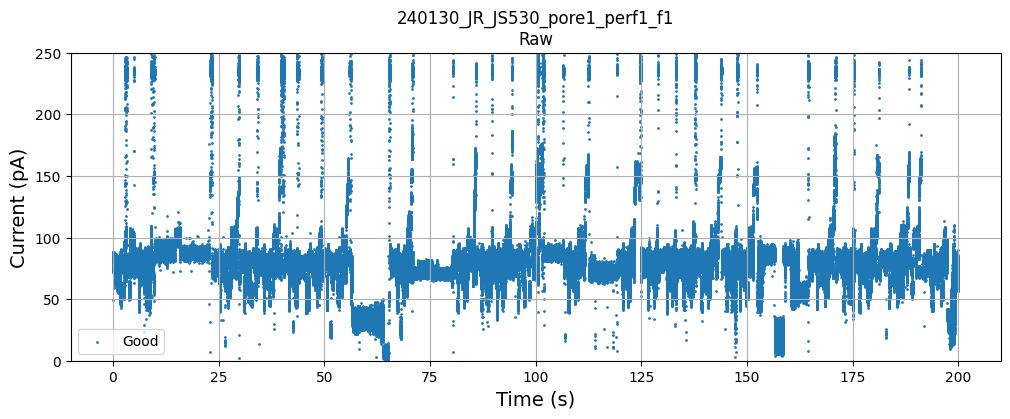

In [4]:
raw.data = raw.data.truncate(after=1000000)
raw.plot()

(<Figure size 1200x400 with 2 Axes>,
 array([<Axes: xlabel='Time (s)', ylabel='Voltage (mV)'>, <Axes: >],
       dtype=object))

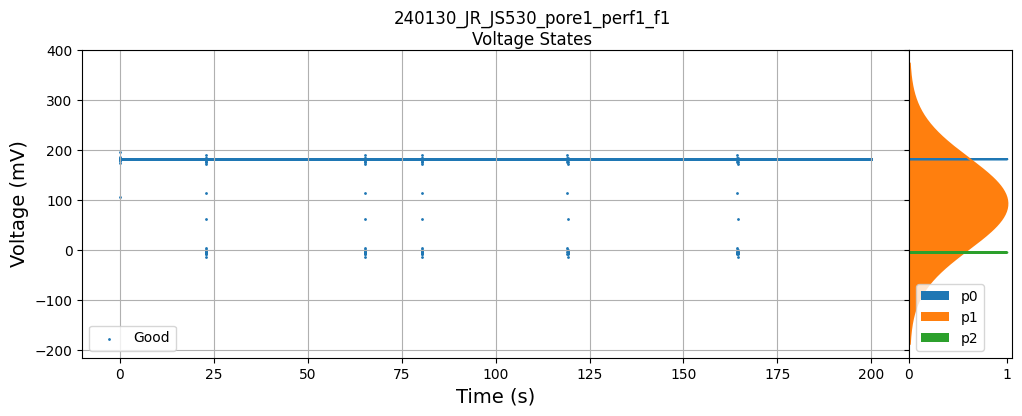

In [5]:
eventdetection.plot_voltage_state(raw, n_components=3)

In [6]:
events = Events(raw)

TypeError: Events.__init__() missing 2 required positional arguments: 'properties' and 'events'

In [ ]:
raw.plot()

In [7]:
raw.save("assets/test_measurement_small")

In [ ]:
len(events)

In [ ]:
events.idxs

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random

def plot_event(num):
    events.plot(num)
    return ()
    
interact(plot_event, num=(1,len(events)-1,1));

In [ ]:
raw.